Human brain research is among the most complex areas of study for scientists. We know that age and other factors can affect its function and structure, but more research is needed into what specifically occurs within the brain. With much of the research using MRI scans, data scientists are well positioned to support future insights. In particular, neuroimaging specialists look for measurable markers of behavior, health, or disorder to help identify relevant brain regions and their contribution to typical or symptomatic effects.


In this competition, you will predict multiple assessments plus age from multimodal brain MRI features. You will be working from existing results from other data scientists, doing the important work of validating the utility of multimodal features in a normative population of unaffected subjects. Due to the complexity of the brain and differences between scanners, generalized approaches will be essential to effectively propel multimodal neuroimaging research forward.

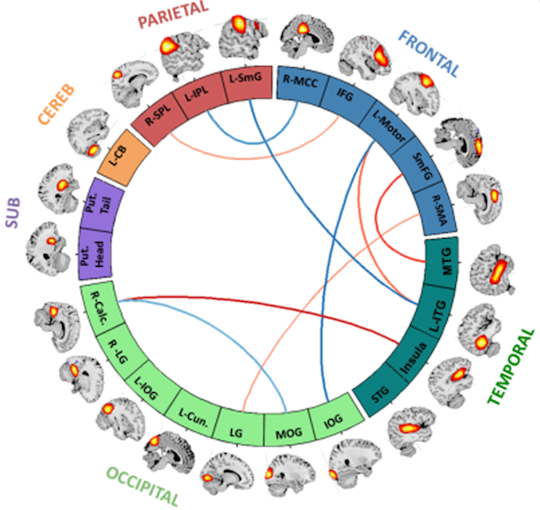

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nibabel as nib
from tqdm import tqdm
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns

In [ ]:
ROOT = "/kaggle/input/trends-assessment-prediction/"
!ls {ROOT}

In [ ]:
# image and mask directories
data_dir = f'{ROOT}/fMRI_train'
loading_data = f'{ROOT}loading.csv'
icn_data = f'{ROOT}ICN_numbers.csv'
fnc_data = f'{ROOT}fnc.csv'
train_scores_data = f'{ROOT}train_scores.csv'
fmri_mask = f'{ROOT}fMRI_mask.nii'

In [ ]:
load_data = pd.read_csv(loading_data)
icn_data = pd.read_csv(icn_data)
fnc_data = pd.read_csv(fnc_data)
train_scores_data = pd.read_csv(train_scores_data)

In [ ]:
load_data.head()

In [ ]:
print(load_data.shape)

In [ ]:
load_data.head()

In [ ]:
icn_data.head()

In [ ]:
icn_data.shape

In [ ]:
fnc_data.head()

In [ ]:
train_scores_data.head()

In [ ]:
targets= load_data.columns[1:]
fig, axes = plt.subplots(6, 5, figsize=(18, 15))
axes = axes.ravel()
bins = np.linspace(-0.05, 0.05, 20)

for i, col in enumerate(targets):
    ax = axes[i]
    sns.distplot(load_data[col], label=col, kde=False, bins=bins, ax=ax)
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
targets= train_scores_data.columns[1:]
fig, axes = plt.subplots(1, 5, figsize=(18, 4))
axes = axes.ravel()
bins = np.linspace(0, 100, 20)

for i, col in enumerate(targets):
    ax = axes[i]
    sns.distplot(train_scores_data[col], label=col, kde=False, bins=bins, ax=ax)

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
cols = load_data.columns[1:]
sns.heatmap(load_data[cols].corr(), ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
cols = train_scores_data.columns[1:]
sns.heatmap(train_scores_data[cols].corr(), ax=ax)

# Reading a nii file

NiBabel supports an ever growing collection of neuroimaging file formats. Every file format format has its own features and pecularities that need to be taken care of to get the most out of it. To this end, NiBabel offers both high-level format-independent access to neuroimages, as well as an API with various levels of format-specific access to all available information in a particular file format. The following examples show some of NiBabel’s capabilities and give you an idea of the API.

In [ ]:
img = nib.load(fmri_mask)

In [ ]:
print(img.shape)
print(img.get_data_dtype())
print(img.get_data_dtype() == np.dtype(np.float32))
print(img.affine.shape)
data = img.get_fdata()
print(data.shape)
print(type(data))
hdr = img.header
print(hdr.get_xyzt_units())
raw = hdr.structarr
print(raw['xyzt_units'])

Splitting the DataFrame into Train and Test


In [ ]:
df_loading_train = load_data[load_data.Id.isin(train_scores_data.Id)]
df_loading_test = load_data[~load_data.Id.isin(train_scores_data.Id)]

In [ ]:
df_loading_train.head()

In [ ]:
df_loading_test.head()

In [ ]:
# Equally splitted data 
print(df_loading_test.shape)
print(df_loading_train.shape)

In [ ]:
df_fnc_train = fnc_data[fnc_data.Id.isin(train_scores_data.Id)]
df_fnc_test = fnc_data[~fnc_data.Id.isin(train_scores_data.Id)]

In [ ]:
print(df_fnc_train.shape)
print(df_fnc_test.shape)

In [ ]:
df_train_loading_fcn = pd.merge(df_loading_train, df_fnc_train, on = 'Id', how = 'inner')
df_test_loading_fcn =   pd.merge(df_loading_test, df_fnc_test, on = 'Id', how = 'inner')

print(df_train_loading_fcn.shape)
print(df_test_loading_fcn.shape)

In [ ]:
columns = df_train_loading_fcn.columns
df_test_loading_fcn = df_test_loading_fcn[columns]

In [ ]:
p_value = .00001   # you can change the p-value and experiment
list_p_value =[]

for i in tqdm(columns[1:]):
    list_p_value.append(stats.ks_2samp(df_test_loading_fcn[i] , df_train_loading_fcn[i])[1])

Se = pd.Series(list_p_value, index = columns[1:]).sort_values() 
list_dissimilar = list(Se[Se < p_value].index)

In [ ]:
len(list_dissimilar)

In [ ]:
df_train_loading_fcn.head()

More Coming Soon...